In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import psutil
import os

sys.path.append("./scripts/")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import muon as mu
mu.set_options(display_style = "html", display_html_expand = 0b000);

In [2]:
%load_ext autoreload
%autoreload 2
from utils.interoperability import adata_to_mtx

# Load Data

In [3]:
file_path = "../data/qc_data/121c_adt_gex_qc.h5mu"
mdata = mu.read_h5mu(file_path)
mdata

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


adt:Cell_Type_Experimental,category,"T_gamma_delta,Monocyte_classical,T_CD4_memory,Mono..."
adt:Sample_Tag,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:Sample_Name,category,"SampleTag03_hs,SampleTag10_hs,SampleTag12_hs,Sampl..."
adt:SampleTag01_hs_Read_Count,int64,"128,13,6,10,11,11,30,5,0,55,5430,16,0,8,11,70,21,5..."
adt:SampleTag02_hs_Read_Count,int64,"27,103,1,38,36,1,3,15,7,121,61,419,9,16,21,12,2,0,..."
adt:SampleTag03_hs_Read_Count,int64,"7286,24,0,55,17,10,3,7,750,27244,27,94,0,7,39,11,3..."
adt:SampleTag04_hs_Read_Count,int64,"39,60,44,24086,12456,8,7,18,5,383,14,79,0,34,111,3..."
adt:SampleTag05_hs_Read_Count,int64,"17,25,4,46,1,173,2,2,2,42,9,23,0,12,103,25,4,0,25,..."
adt:SampleTag06_hs_Read_Count,int64,"18,20,8,38,37,3,21,2,28,242,24,24696,10,16,67,51,1..."
adt:SampleTag07_hs_Read_Count,int64,"17,42,23,46,66,6260,6,6,11,370,32,58,327,27,113,49..."
adt:SampleTag08_hs_Read_Count,int64,"130,241,20,130,38,5,9,10,6,89,23,40,5,4272,93,25,6..."


In [4]:
data_path = "../data/"

if "tmp" not in os.listdir(data_path):
    os.mkdir(os.path.join(data_path, "tmp"))
    
tmp_path =  os.path.join(data_path, "tmp") 
adata_to_mtx(mdata["gex"], dir_path=tmp_path)

File saved to ../data/tmp


In [5]:
#TODO: I need to explain how this works

In [6]:
binomial_dev = pd.read_csv("../data/tmp/binomial.dev.csv", index_col=0)
binomial_dev.columns = binomial_dev.columns.str.replace(".", "_")

if "binomial_dev" in mdata["gex"].var.columns:
    mdata["gex"].var.drop("binomial_dev", axis=1, inplace=True)
    
mdata["gex"].var = mdata["gex"].var.join(binomial_dev)

In [7]:
n_genes = 4000
idx = list(mdata["gex"].var.binomial_dev.argsort())[::-1][:n_genes]
mask = np.zeros(mdata["gex"].var_names.shape, dtype=bool)
mask[idx] = True
mdata["gex"].var["highly_deviant"] = mask
mdata["gex"].var["binomial_deviance"] = binomial_dev.binomial_dev

In [8]:
sc.pp.highly_variable_genes(
    mdata["gex"], 
    layer="log1p_norm",
    min_mean=0.0125, 
    max_mean=3,
    min_disp=0.5
)

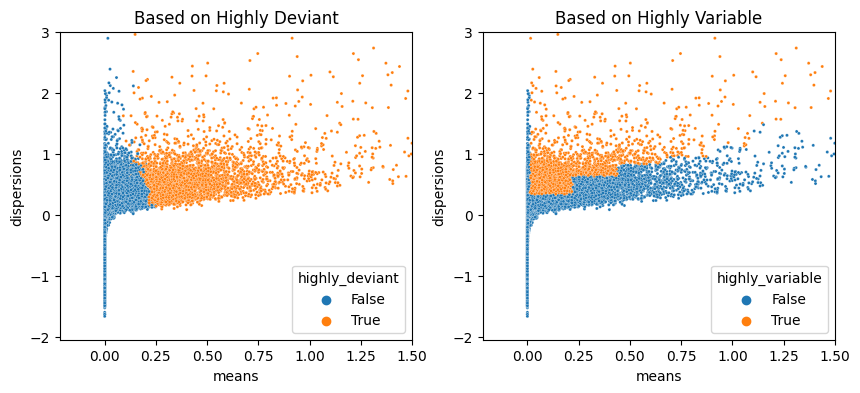

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_deviant", s=5,
    ax=axs[0]
)
axs[0].set_title("Based on Highly Deviant")
sns.scatterplot(
    data=mdata["gex"].var, x="means", y="dispersions", hue="highly_variable", s=5,
    ax=axs[1]
)
axs[1].set_title("Based on Highly Variable")
for ax in axs:
    ax.set_xlim(None, 1.5)
    ax.set_ylim(None, 3)

plt.show()

# Dimensionalty Reduction

## PCA

## Preprocessing steps before running PCA

In [10]:
# Choose parameter for highly_variable
# highly_var = "highly_variable"
highly_var = "highly_deviant"
mdata["gex"].layers["raw"] = mdata["gex"].X.copy()
mdata["gex"].X = mdata["gex"].layers["log1p_norm"].copy()

mdata["gex"].var["highly_variable"] = mdata["gex"].var[highly_var]
adata_hv = mdata["gex"][: ,mdata["gex"].var[highly_var]].copy()

In [11]:
num_processors = psutil.cpu_count(logical=False)
sc.pp.regress_out(adata_hv, ["pct_counts_mt", "total_counts"])

#scales the data in the AnnData object so that each gene has a mean of zero and a standard deviation of one. 
# This standardization is a common preprocessing step, and it ensures that each gene has equal weight..
sc.pp.scale(
    adata_hv, 
    max_value=10 # caps the maximum value after scaling. This helps limit the impact of extreme outliers.
)

### Perform PCA

In [12]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
sc.tl.pca(adata_hv, svd_solver="arpack", n_comps=50, use_highly_variable=True)

In [13]:
def plot_pc_rank(adata, n_pcs=20):
    plt.figure(figsize=(10, 3))

    log_var_ratio = np.log(adata.uns["pca"]["variance_ratio"])

    sns.scatterplot(log_var_ratio, s=30, edgecolor="black")
    plt.vlines(x=[i for i in range(len(log_var_ratio))], 
               ymin=min(log_var_ratio), 
               ymax=log_var_ratio, 
               color="grey", 
               zorder=-1,
               alpha=0.5
              )
    plt.vlines(x=n_pcs, color="r", ymin=min(log_var_ratio), ymax=max(log_var_ratio), linestyle="--")
    plt.ylabel("Log Variance Ratio")
    plt.xlabel("PC Rank")

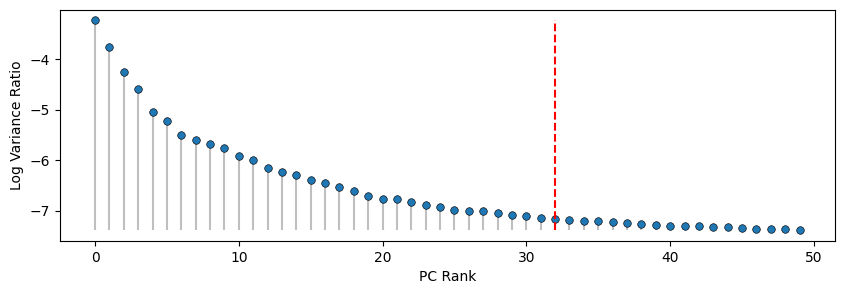

In [14]:
n_pcs=32 # Number of PCs for Downstream Clustering.
plot_pc_rank(adata_hv, n_pcs=n_pcs)

## UMAP

Plot multiple UMAP at different neighborings to select the best clustering. We can use Cell_Type_Experimental from BD Rhapsody as a guide. 

In [15]:
import asyncio
from IPython.display import clear_output

In [16]:
async def process_neighbor(n, ax, adata_hv, n_pcs):
    # Introduce artificial async, because your tasks are CPU-bound and not naturally async.
    await asyncio.sleep(0)  # gives a chance for other tasks to run
    
    sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n)
    umap_res = sc.tl.umap(adata_hv, copy=True)
    sc.pl.umap(
        umap_res,
        color="Cell_Type_Experimental",
        frameon=False, 
        title=f"n_neighbors {n}", 
        show=False, 
        legend_loc=None,
        ax=ax
    )
    print(f"neighbor{n} done!")
    clear_output(wait=True)

In [17]:
async def main():
    np.random.seed(42)
    fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(5, 4))
    axs = axs.flatten()

    neighbors_itr = range(20, 80, 10)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Create coroutines for each neighbor value and ax, and run them concurrently.
        await asyncio.gather(*(process_neighbor(n, ax, adata_hv, n_pcs) for n, ax in zip(neighbors_itr, axs)))

        fig.tight_layout()
        plt.show()

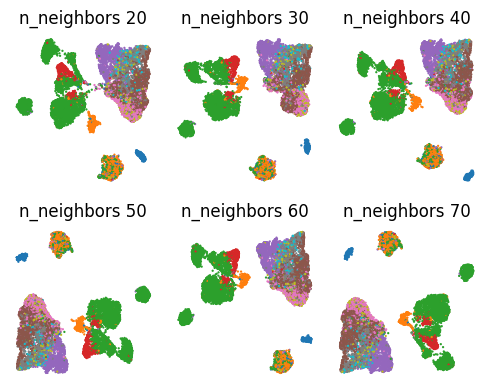

In [18]:
# Execute
await main()

In [19]:
np.random.seed(42)
n_neighbors = 60
sc.pp.neighbors(adata_hv, n_pcs=n_pcs, n_neighbors=n_neighbors)
sc.tl.umap(adata_hv)

### Inspecting quality control metrics

In [20]:
adata_hv.obs["exp_cell_l1"] = ["_".join(cell) if "Natural" in cell else cell[0] for cell in adata_hv.obs.Cell_Type_Experimental.str.split("_") ]

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


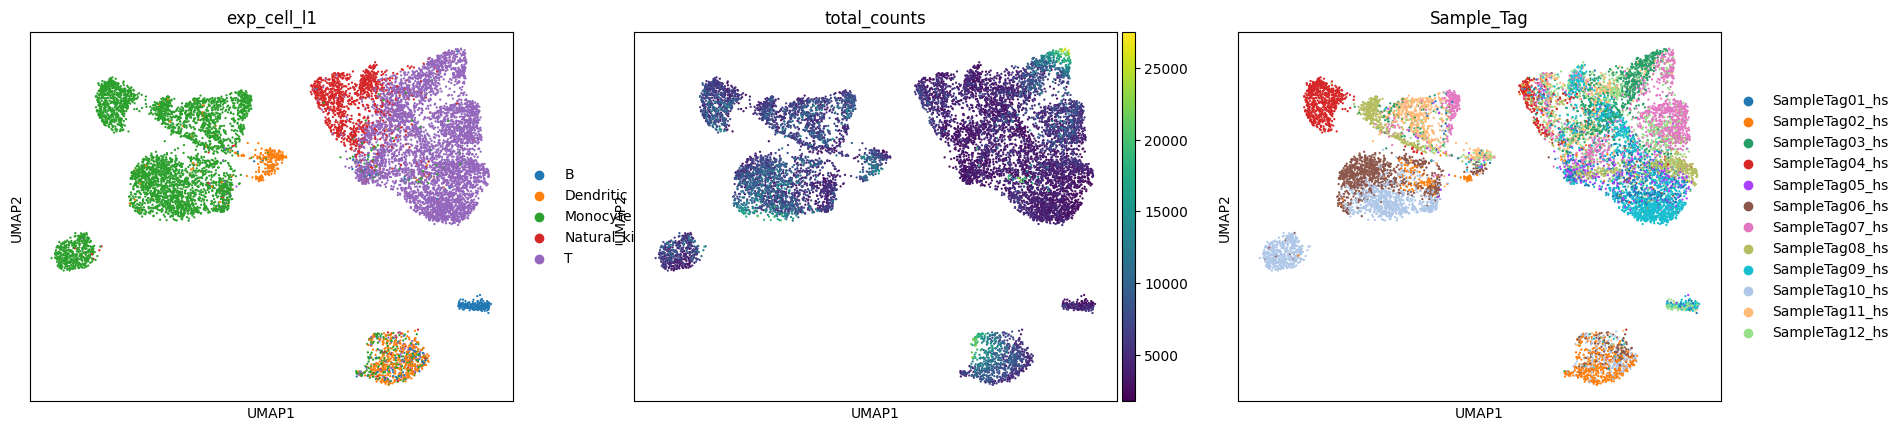

In [21]:
sc.pl.umap(adata_hv, color=["exp_cell_l1", "total_counts", "Sample_Tag"], )

# Clustering

## Choosing the resolution

/Users/djlisko/gitrepos/rhapsody-analysis-notebook/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


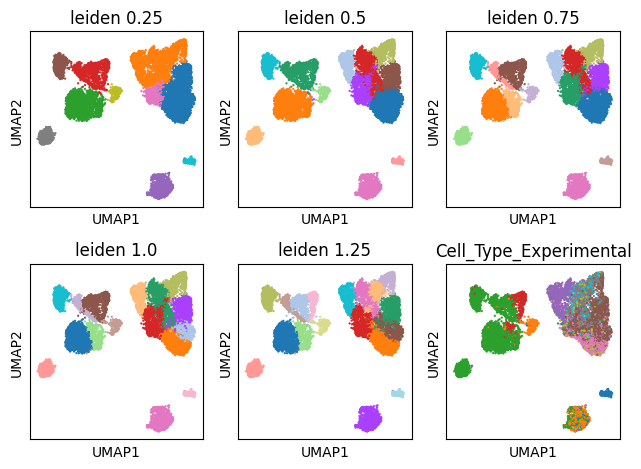

In [22]:
# Defining a list of resolutions (determines the granularity of the clustering)
# Higher resolution ->  leads to a higher number of smaller clusters
resoltuions = [i/100 for i in range(25, 150, 25)]
np.random.seed(42)

fig, axs  = plt.subplots(ncols=3, nrows=2);
axs = axs.flatten()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Peforming leiden algorithm at each resolution in the list (we can use this lader to adjust based on annotations).
    for i, resolution in enumerate(resoltuions):
        sub_data = sc.tl.leiden(adata_hv, copy=True, resolution=resolution)
        _ = sc.pl.umap(
            sub_data,
            color="leiden",
            legend_loc=None,
            ax=axs[i],
            show=False
        );
        axs[i].set_title(f"leiden {resolution}")
        
_ = sc.pl.umap(
    sub_data,
    color="Cell_Type_Experimental",
    ax=axs[-1],
    show=False,
    legend_loc=None
);

fig.tight_layout()

In [23]:
resolution = 1.25

# Annotation

## Automated Annotation

In [24]:
import celltypist
from celltypist import models

### Celltypist

In [25]:
adata_celltypist =  adata_hv.copy()  # make a copy of our adata
adata_celltypist.X = sub_data.layers["raw"].todense().astype(float)  # set adata.X to raw counts
sc.pp.normalize_per_cell(adata_celltypist, counts_per_cell_after=10000)  # normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)  # log-transform

### Available Models

In [26]:
models.models_description() # To get a list of models available.

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_CynomolgusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult cynom...
3,Adult_Human_PancreaticIslet.pkl,cell types from pancreatic islets of healthy a...
4,Adult_Human_Skin.pkl,cell types from human healthy adult skin
5,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
6,Adult_Mouse_OlfactoryBulb.pkl,cell types from the olfactory bulb of adult mice
7,Adult_Pig_Hippocampus.pkl,cell types from the adult pig hippocampus
8,Adult_RhesusMacaque_Hippocampus.pkl,cell types from the hippocampus of adult rhesu...
9,Autopsy_COVID19_Lung.pkl,cell types from the lungs of 16 SARS-CoV-2 inf...


### Choose which database to use from above

In [27]:
# # Change this to the models you would like to use (see website for details)
model_choices = ["Immune_All_Low.pkl", "Immune_All_High.pkl"]
models.download_models(
    force_update=True, model=model_choices
)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 44
📂 Storing models in /Users/djlisko/.celltypist/data/models
💾 Total models to download: 2
💾 Downloading model [1/2]: Immune_All_Low.pkl
💾 Downloading model [2/2]: Immune_All_High.pkl


In [28]:
##column_prefixes
prefix = {
    "Immune_All_Low.pkl": "ct_low",
    "Immune_All_High.pkl": "ct_high"
}

In [29]:
adata_celltypist.X = np.asarray(adata_celltypist.X)
for choice in model_choices:
    print(choice.upper())
    model = models.Model.load(model=choice)
    predictions_high = celltypist.annotate(adata_celltypist.copy(), model=model, majority_voting=True)
    col_name = choice.split(".")[0].lower()
    
    # Make Predictions
    predictions = celltypist.annotate(
        adata_celltypist.copy(),
        model=model,
        majority_voting=True
    ).to_adata().obs.iloc[:, -4:]

    predictions.columns = [f"{prefix[choice]}_{col}"for col in predictions.columns]
    adata_celltypist.obs = adata_celltypist.obs.join(predictions)

🔬 Input data has 11246 cells and 4000 genes
🔗 Matching reference genes in the model


IMMUNE_ALL_LOW.PKL


🧬 1933 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 11246 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 1933 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 11246 cells and 4000 genes
🔗 Matching reference genes in the model


IMMUNE_ALL_HIGH.PKL


🧬 1933 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!
🔬 Input data has 11246 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 1933 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 10
🗳️ Majority voting the predictions
✅ Majority voting done!


### Plot results

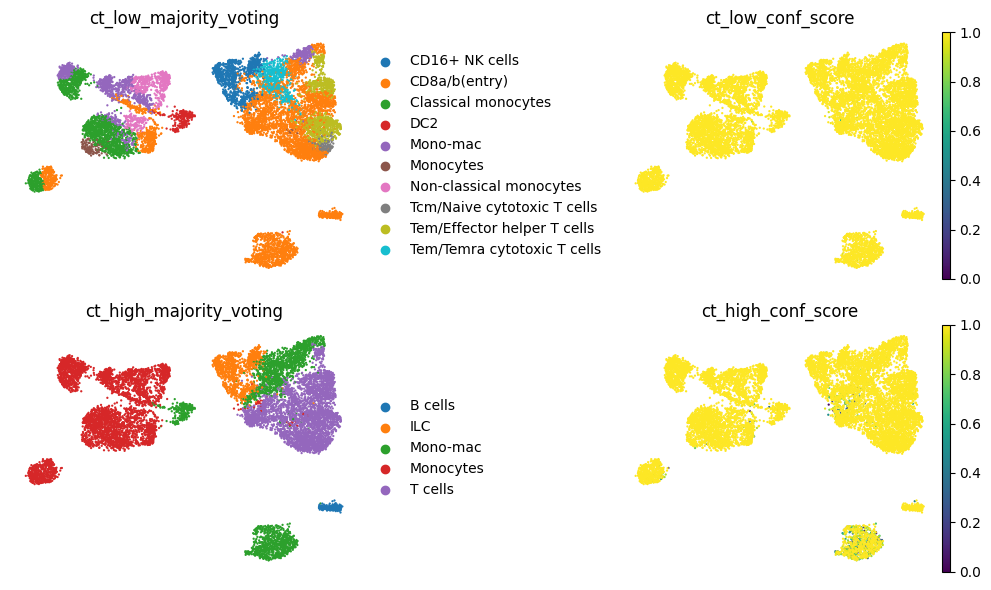

In [30]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))

metrics = ["majority_voting", "conf_score"]
for prfx , ax in zip(prefix.values(), axs):
    ax1, ax2 = ax
    _ = sc.pl.umap(adata_celltypist, color=f"{prfx}_{metrics[0]}", show=False, ax=ax1, frameon=False)
    _ = sc.pl.umap(adata_celltypist, 
                   color=f"{prfx}_{metrics[1]}", 
                   show=False, 
                   ax=ax2, 
                   vmax=1, 
                   vmin=0, 
                   frameon=False
                  )
    
fig.tight_layout()

### Azimouth Annotation

In [31]:
az_file_path = "../data/qc_data/121c_azmth_ready_v2.h5ad"

az_adata = sc.AnnData(X=adata_hv.layers["raw"])

az_adata.var_names = adata_hv.var_names
az_adata.obs_names = adata_hv.obs_names
az_adata.write_h5ad(az_file_path)

In [32]:
azmth_pred  = pd.read_csv("../data/qc_data/121c_azmth_prd.csv", index_col=0)
azmth_pred.index = azmth_pred.index.astype(str)
adata_hv.obs = adata_hv.obs.join(azmth_pred)

... storing 'az_l1_celltype' as categorical
... storing 'az_l2_celltype' as categorical


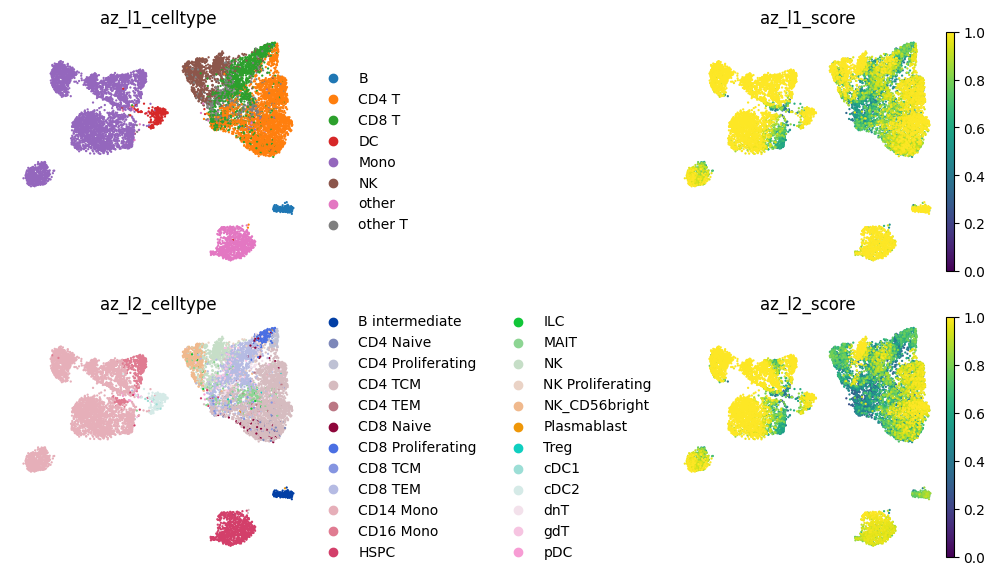

In [33]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))

metrics = ["celltype", "score"]
for prfx , ax in zip(["az_l1", "az_l2"], axs):
    ax1, ax2 = ax
    _ = sc.pl.umap(adata_hv, color=f"{prfx}_{metrics[0]}", show=False, ax=ax1, frameon=False)
    _ = sc.pl.umap(adata_hv, 
                   color=f"{prfx}_{metrics[1]}", 
                   show=False, 
                   ax=ax2, 
                   vmax=1, 
                   vmin=0, 
                   frameon=False
                  )
    
fig.tight_layout()

### Combine results and add to Mudata

In [34]:
cols = adata_celltypist.obs.columns.str.startswith("ct_")
adata_hv.obs = adata_hv.obs.join(adata_celltypist.obs.iloc[:, cols])

# Annotate ADT

In [43]:
from bokeh.plotting import show, figure
from bokeh.io import output_notebook, push_notebook
from bokeh.models import Div, Dropdown, CustomJS, Button, ColumnDataSource, TabPanel, Tabs
from bokeh.models.widgets import Select
from bokeh.layouts import row, column, layout

### Start bokeh server

In [36]:
output_notebook()

Loading BokehJS ...

# ADT Results

In [37]:
mdata["adt"].X = mdata["adt"].X.astype(float)
mu.prot.pp.clr(mdata["adt"])

In [53]:
df = pd.DataFrame(mdata["adt"].X.todense(), columns=mdata["adt"].var_names, index=mdata["adt"].obs_names)
default_x, default_y = list(df.columns[:2])

p = figure(width=500, height=500, tools="lasso_select, box_select, poly_select, reset")
data = dict(x=list(df[default_x]),
            y=list(df[default_y])
           )


p.xaxis.axis_label = default_x
p.yaxis.axis_label = default_y

source = ColumnDataSource(data)
r = p.circle(x="x", y="y", source=source)

# Selectors for X and Y axis
# Dropdowns
options = list(df.columns)
x_dropdown = Select(title="X-axis:", value=default_x, options=options, width=250)
y_dropdown = Select(title="Y-axis:", value=default_y, options=options, width=250)

callback = CustomJS(args=dict(p=p.axis, source=source, df=df.to_dict("list"), x_dropdown=x_dropdown, y_dropdown=y_dropdown,), code="""
    const [x_axis, y_axis] = p
    console.log(x_axis)
    const chosenX = df[x_dropdown.value];
    const chosenY = df[y_dropdown.value];

    if (chosenX) {
    source.data['x'] = chosenX;
    x_axis.axis_label = x_dropdown.value;
    }

    if (chosenY) {
    source.data['y'] = chosenY;
    y_axis.axis_label = y_dropdown.value;
    }
    source.change.emit();
""")

x_dropdown.js_on_change("value", callback)
y_dropdown.js_on_change("value", callback)

# make a grid
dropdowns = column(x_dropdown, y_dropdown)
l1 = layout(
    row(dropdowns, p)
)

tab1 = TabPanel(child=l1, title="Scatter", )

p2 = figure(width=600, height=250)
hist, edges = np.histogram(df["CD3:SK7|CD3E|AHS0033|pAbO"], density=True, bins=100)
p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         fill_color="skyblue", line_color="white")

div = Div(text="CD3:SK7|CD3E|AHS0033|pAbO")


l2 = layout(
    row(div),
    row(p2)
)

tab2 = TabPanel(child=l2, title="Histogram", )
show()

layout(
    column(Tabs(tabs=[tab1, tab2]))
    column(Div(text="Cell Results")
)

SyntaxError: '(' was never closed (1015743930.py, line 67)